In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


1. Explore the high-level characteristics of the dataset using standard functions in the Pandas Python
library. How many students have been surveyed for the collection of the dataset? Analyze the set of
attributes available in the dataset. List out the type of each attribute: is it categorical or numerical? Is
it nominal, ordinal, discrete, or continuous?

In [2]:
df = pd.read_csv('SDS_Hackathon_Dataset_30_11_22.csv')
df

,Unnamed: 0,Active,Rest,Smoke,Gender,Exercise,Hgt,Wgt
0,0,97.0,78.0,0.0,1.0,1.0,63.0,119.0
1,1,82.0,68.0,1.0,0.0,3.0,70.0,225.0
2,2,88.0,62.0,0.0,0.0,3.0,72.0,175.0
3,3,106.0,74.0,0.0,0.0,3.0,72.0,170.0
4,4,78.0,63.0,0.0,1.0,3.0,67.0,125.0
...,...,...,...,...,...,...,...,...
227,227,105.0,85.0,0.0,1.0,2.0,64.0,150.0
228,228,82.0,74.0,0.0,1.0,3.0,66.0,124.0
229,229,102.0,81.0,0.0,0.0,2.0,69.0,172.0
230,230,87.0,67.0,0.0,0.0,2.0,68.0,170.0


In [3]:
print('the number of students:',df.shape[0])


the number of students: 232


In [4]:
df.dtypes

Unnamed: 0      int64
Active        float64
Rest          float64
Smoke         float64
Gender        float64
Exercise      float64
Hgt           float64
Wgt           float64
dtype: object

In [5]:
print('the categorical columns are :',df.columns[3],df.columns[4])
print('the numerical columns are :',df.columns[1],df.columns[2],df.columns[5],df.columns[6],df.columns[7])

the categorical columns are : Smoke Gender
the numerical columns are : Active Rest Exercise Hgt Wgt


In [6]:
print('the nominal & discrete data :',df.columns[3],df.columns[4])
print('the discrete values are :',df.columns[5])
print('the continous values are:',df.columns[1],df.columns[2],df.columns[6],df.columns[7])
#recheck

the nominal & discrete data : Smoke Gender
the discrete values are : Exercise
the continous values are: Active Rest Hgt Wgt


2. A summary statistic quantitatively summarizes the data in a particular feature using a single number.
There are two popular types of summary statistics: measures of central tendency and measures of
dispersion. For each attribute in the dataset, figure out the most effective measure of central tendency
and state its value. Also, determine the standard deviation and range of values in each column.
Hint: Think about whether the mean, median, or mode is a more insightful measure of central tendency for a
feature depending on its type (categorical or numerical).

In [7]:
print(df.std())


Unnamed: 0    67.116814
Active        18.880625
Rest          10.007155
Smoke          0.318553
Gender         0.500147
Exercise       0.735484
Hgt            3.736298
Wgt           31.381306
dtype: float64


In [8]:
print(df.max()-df.min())

Unnamed: 0    231.0
Active        103.0
Rest           63.0
Smoke           1.0
Gender          1.0
Exercise        2.0
Hgt            18.0
Wgt           158.0
dtype: float64


we can use median as an effective measure of central tendency, the median is : 88.5


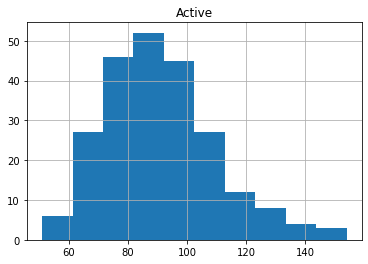

In [9]:
df['Active'].hist() #skewed right
plt.title('Active')
print('we can use median as an effective measure of central tendency, the median is :',df['Active'].median())


we can use mean as an effective measure of central tendency , the mean is: 68.35807860262008


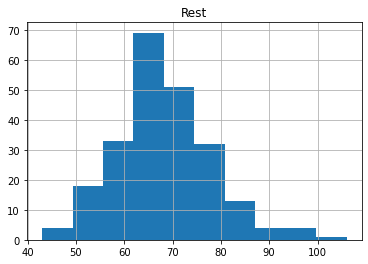

In [10]:
df['Rest'].hist() #normal
plt.title('Rest')
print('we can use mean as an effective measure of central tendency , the mean is:',df['Rest'].mean())


we can use mean as an effective measure of central tendency, the mean is: 68.32735426008969


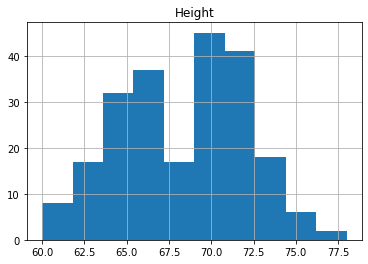

In [11]:
df['Hgt'].hist() #bimodal
plt.title('Height')
print('we can use mean as an effective measure of central tendency, the mean is:',df['Hgt'].mean())

we can use median as an effective measure of central tendency,the median is : 151.0


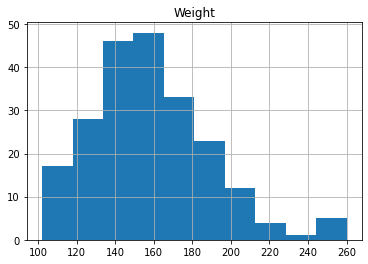

In [12]:
df['Wgt'].hist() #skewed right
plt.title('Weight')
print('we can use median as an effective measure of central tendency,the median is :',df['Wgt'].median())

we can use mean as an effective measure of central tendency,the mean is: 2.25974025974026


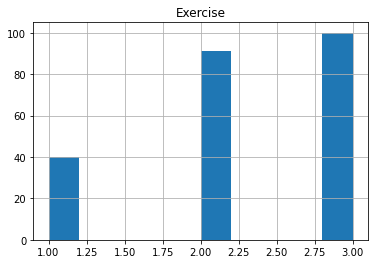

In [13]:
df['Exercise'].hist()
plt.title('Exercise')
print('we can use mean as an effective measure of central tendency,the mean is:',df['Exercise'].mean())

we can use mode as an effective measure of central tendency,the mode is : 0    0.0
Name: Smoke, dtype: float64


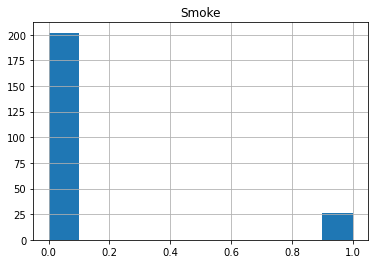

In [14]:
df['Smoke'].hist()
plt.title('Smoke')
print('we can use mode as an effective measure of central tendency,the mode is :',df['Smoke'].mode())

we can use mode as an effective measure of central tendency, the mode is: 0    0.0
Name: Gender, dtype: float64


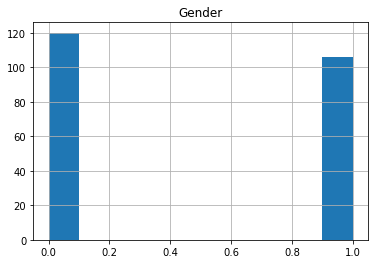

In [15]:
df['Gender'].hist()
plt.title('Gender')
print('we can use mode as an effective measure of central tendency, the mode is:',df['Gender'].mode())

#### 3. Dealing with missing data is a crucial step in the process of data analysis. It can have a significant
impact on the conclusions drawn from the data. Determine the number of missing records in each
column of the dataset. Figure out the most effective way to deal with missing data in each column.
Transform each column and make sure none of the columns have any missing values.

In [16]:
df.isnull().sum()

Unnamed: 0     0
Active         2
Rest           3
Smoke          4
Gender         6
Exercise       1
Hgt            9
Wgt           15
dtype: int64

In [17]:
#replace with mode
x=df['Gender'].mode()
y=df['Smoke'].mode()
df['Gender'].fillna(value=0,inplace=True)
df['Smoke'].fillna(value=0,inplace=True)

In [18]:
#replace with median
a=df['Active'].median()
b=df['Wgt'].median()
df['Active'].fillna(value=a,inplace=True)
df['Wgt'].fillna(value=b,inplace=True)


In [19]:
#replace with mean
df['Rest'].fillna(value=df['Rest'].mean(),inplace=True)
df['Exercise'].fillna(value=df['Exercise'].mean(),inplace=True)
df['Hgt'].fillna(value=df['Hgt'].mean(),inplace=True)


In [20]:
df.isnull().sum()

Unnamed: 0    0
Active        0
Rest          0
Smoke         0
Gender        0
Exercise      0
Hgt           0
Wgt           0
dtype: int64

4. Determine the number of classes of every categorical variable in the dataset. Plot bar graphs for all
the categorical attributes to determine the frequency of the classes in each attribute. For example, plot
a bar chart to determine the number of smokers and non-smokers. Do so for all categorical variables.
What inferences about the survey can you make based on the visualizations?

/Users/chandanamulagund/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Smoke', ylabel='count'>

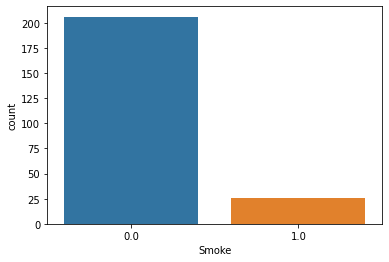

In [21]:

sns.countplot(df['Smoke'])


/Users/chandanamulagund/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

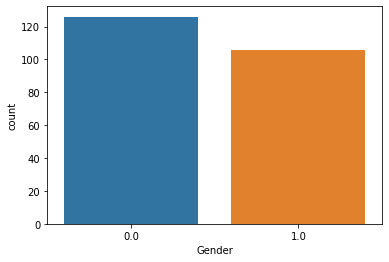

In [22]:
sns.countplot(df['Gender'])


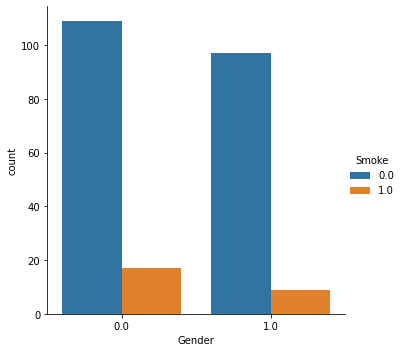

In [23]:
sns.catplot(x = 'Gender', hue = 'Smoke', kind = 'count', data = df)

In [24]:
print("The insights from this bar graph are that \n1.The number of smokers are very less\n2.Most of the people are non smokers\n3.There are almost equal number of male and females in the experiment")

The insights from this bar graph are that 
1.The number of smokers are very less
2.Most of the people are non smokers
3.There are almost equal number of male and females in the experiment


#### 5. Plot histograms for all the numerical attributes to determine the distribution of the values in each attribute. Discuss the modality and skewness of each distribution. What inferences about the survey can you make based on the visualizations?

<AxesSubplot:xlabel='Wgt', ylabel='Count'>

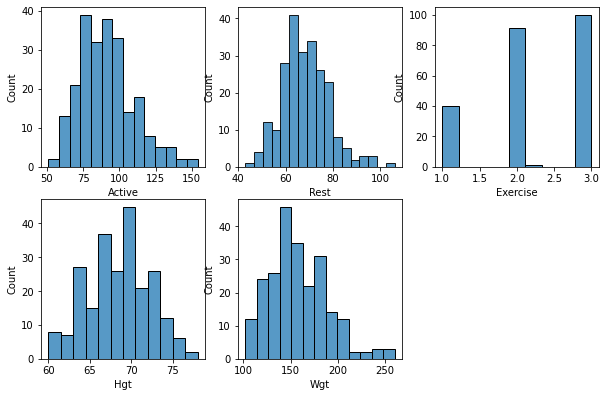

In [25]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.histplot(df.Active)
#plt.title('active')

plt.subplot(3,3,2)
sns.histplot(df.Rest)
#plt.title('rest')

plt.subplot(3,3,3)
sns.histplot(df.Exercise)
#plt.title('exercise')

plt.subplot(3,3,4)
sns.histplot(df.Hgt)
#plt.title('height')

plt.subplot(3,3,5)
sns.histplot(df.Wgt)
#plt.title('weight')




In [26]:
print("The plot for active is skewed right\nRest is normally distributed\nexercise is discrete\nheight is bimodal\nweight is skewed right")

The plot for active is skewed right
Rest is normally distributed
exercise is discrete
height is bimodal
weight is skewed right


6. Visualize the active and resting pulse rates of all the participants using box plots. What is the in-
terquartile range of the active pulse rates? How does this compare to the IQR of the resting pulse

rates? Now, visualize the active and resting pulse rates when grouped by gender. What inferences
can you make from the graph? Repeat the same exercise for both the pulse rates when grouped by
the amount of exercise and the smoking preference, separately. Draw inferences from all the graphs
obtained.

In [27]:
df.describe()

,Unnamed: 0,Active,Rest,Smoke,Gender,Exercise,Hgt,Wgt
count,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000
mean,115.500000,91.288793,68.358079,0.112069,0.456897,2.259740,68.327354,157.676724
std,67.116814,18.800519,9.941961,0.316133,0.499216,0.733891,3.662790,30.396283
min,0.000000,51.000000,43.000000,0.000000,0.000000,1.000000,60.000000,102.000000
25%,57.750000,79.000000,62.000000,0.000000,0.000000,2.000000,66.000000,135.000000
50%,115.500000,88.500000,68.000000,0.000000,0.000000,2.000000,68.327354,151.000000
75%,173.250000,102.000000,74.000000,0.000000,1.000000,3.000000,71.000000,175.000000
max,231.000000,154.000000,106.000000,1.000000,1.000000,3.000000,78.000000,260.000000


In [28]:

Q3 = np.quantile(df['Active'], 0.75)
Q1 = np.quantile(df['Active'], 0.25)
IQR1 = Q3 - Q1
print(IQR1)



23.0


In [29]:
Q3 = np.quantile(df['Rest'], 0.75)
Q1 = np.quantile(df['Rest'], 0.25)
IQR2 = Q3 - Q1
print(IQR2)

12.0


In [30]:
print("Active pulse rate is", IQR1 - IQR2, "more than Rest pulse rate." )

Active pulse rate is 11.0 more than Rest pulse rate.


/Users/chandanamulagund/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Active'>

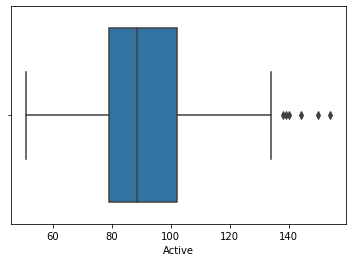

In [31]:
sns.boxplot(df['Active'])


/Users/chandanamulagund/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rest'>

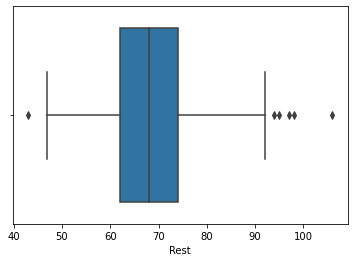

In [32]:
sns.boxplot(df['Rest'])

In [33]:
print("IQR of Active is greater than that of rest which is 23 and 2 respectively")


IQR of Active is greater than that of rest which is 23 and 2 respectively


Boxplot by gender: 
The graph is slightly left skewed for male => more number of men have higher bpm after exercise than the average bpm after exercise
the graph is slightly right skewed for female => more number of female have lower bpm after exercise than average bpm after exercise


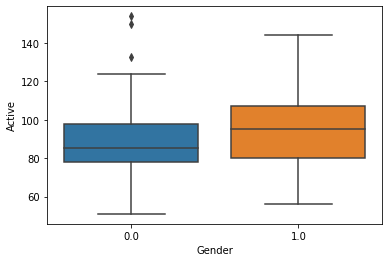

In [34]:
print("Boxplot by gender: ")
sns.boxplot(x = 'Gender', y='Active', data = df)
print("The graph is slightly left skewed for male => more number of men have higher bpm after exercise than the average bpm after exercise")
print("the graph is slightly right skewed for female => more number of female have lower bpm after exercise than average bpm after exercise")



Boxplot by gender: 
The graph of Rest vs male is more or less normally distributed and thus we can conclude the  rest hearbeat of a male is usually within  3 standard deviations(+ or -) from the average rest bpm 
The graph of Rest vs Female is more or less normally distributed thus we can conclude the  rest hearbeat of a female is usually within  3 standard deviations(+ or -) from the average rest bpm


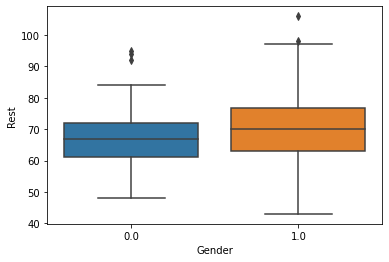

In [35]:
print("Boxplot by gender: ")
sns.boxplot(x='Gender', y='Rest', data=df)
print("The graph of Rest vs male is more or less normally distributed and thus we can conclude the  rest hearbeat of a male is usually within  3 standard deviations(+ or -) from the average rest bpm ")
print("The graph of Rest vs Female is more or less normally distributed thus we can conclude the  rest hearbeat of a female is usually within  3 standard deviations(+ or -) from the average rest bpm")



Boxplot by Smoking: 


<AxesSubplot:xlabel='Smoke', ylabel='Active'>

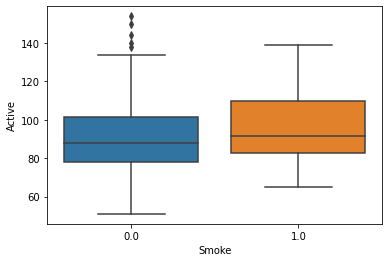

In [36]:
print("Boxplot by Smoking: ")
sns.boxplot(x='Smoke', y='Active', data=df)

Boxplot by smoking: 


<AxesSubplot:xlabel='Smoke', ylabel='Rest'>

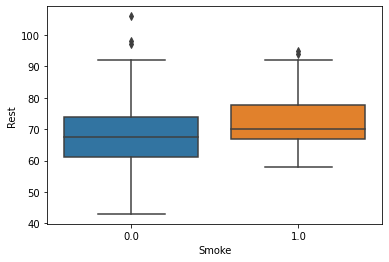

In [37]:
print("Boxplot by smoking: ")
sns.boxplot(x='Smoke', y='Rest', data=df)


Boxplot by Exercise: 


<AxesSubplot:xlabel='Exercise', ylabel='Active'>

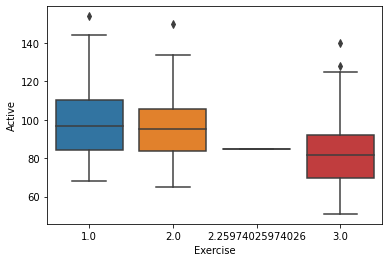

In [38]:
print("Boxplot by Exercise: ")
sns.boxplot(x='Exercise', y='Active', data=df)

Boxplot by Exercise: 


<AxesSubplot:xlabel='Exercise', ylabel='Rest'>

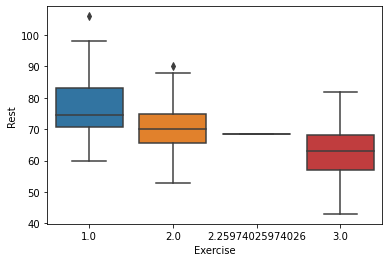

In [39]:
print("Boxplot by Exercise: ")
sns.boxplot(x='Exercise', y='Rest', data=df)

7. Explore the relationship between every pair of numerical variables by constructing a scatterplot ma-
trix. Create a separate scatterplot matrix for each categorical variable: this will allow you to color code

the scatterplots using the categorical variable. By pure visualization alone, which pair of numerical
variables depict the highest linear relationship?
Now, validate these insights by using Python to calculate the Pearson Correlation Coefficients for each
pair of variables in the datasets. Check if these values follow the pattern in the scatterplots created
earlier.

Corr for Active and Gender 0.18859676667347536
Corr for Rest and Gender 0.16488831557163397
Corr for Hgt and Gender -0.7198649601714133
Corr for Wgt and Gender -0.6495182807865185


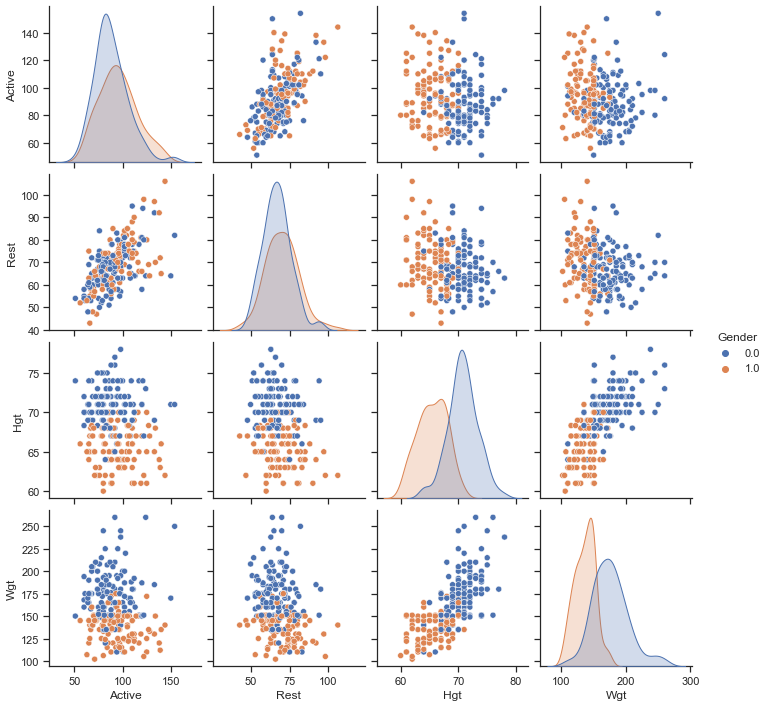

In [40]:
df3=df[['Active', 'Rest','Hgt','Wgt','Gender']].copy()
sns.set_theme(style="ticks")
sns.pairplot(df3, hue='Gender')
from scipy.stats import pearsonr
corr1,_ = pearsonr(df['Active'],df['Gender'])
print('Corr for Active and Gender', corr1)
corr2,_ = pearsonr(df['Rest'],df['Gender'])
print('Corr for Rest and Gender', corr2)
corr3,_ = pearsonr(df['Hgt'],df['Gender'])
print('Corr for Hgt and Gender', corr3)
corr4,_ = pearsonr(df['Wgt'],df['Gender'])
print('Corr for Wgt and Gender', corr4)



Corr for Active and Smoke 0.10924817000211663
Corr for Rest and Smoke 0.15796870369211885
Corr for Hgt and Smoke 0.08033737545590997
Corr for Wgt and Smoke 0.11100615592300797


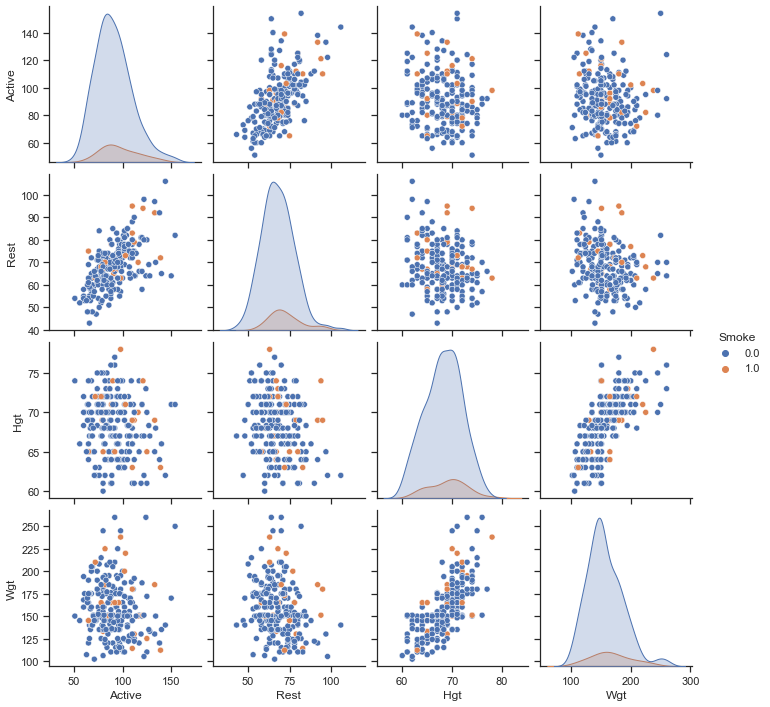

In [41]:
df4=df[['Active', 'Rest','Hgt','Wgt','Smoke']].copy()
sns.set_theme(style="ticks")
sns.pairplot(df4, hue='Smoke')
from scipy.stats import pearsonr
corr1,_ = pearsonr(df['Active'],df['Smoke'])
print('Corr for Active and Smoke', corr1)
corr2,_ = pearsonr(df['Rest'],df['Smoke'])
print('Corr for Rest and Smoke', corr2)
corr3,_ = pearsonr(df['Hgt'],df['Smoke'])
print('Corr for Hgt and Smoke', corr3)
corr4,_ = pearsonr(df['Wgt'],df['Smoke'])
print('Corr for Wgt and Smoke', corr4)

Corr for Active and Exercise -0.36190093197553175
Corr for Rest and Exercise -0.5411774670681968
Corr for Hgt and Exercise 0.17440220061820183
Corr for Wgt and Exercise 0.18370934240075515


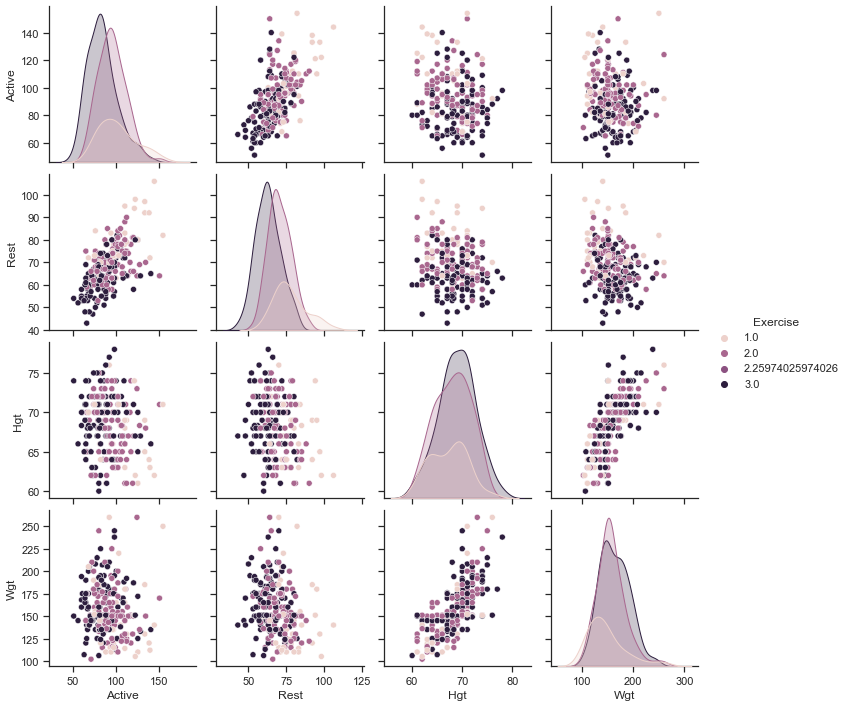

In [42]:
df4=df[['Active', 'Rest','Hgt','Wgt','Exercise']].copy()
sns.set_theme(style="ticks")
sns.pairplot(df4, hue='Exercise')
from scipy.stats import pearsonr
corr1,_ = pearsonr(df['Active'],df['Exercise'])
print('Corr for Active and Exercise', corr1)
corr2,_ = pearsonr(df['Rest'],df['Exercise'])
print('Corr for Rest and Exercise', corr2)
corr3,_ = pearsonr(df['Hgt'],df['Exercise'])
print('Corr for Hgt and Exercise', corr3)
corr4,_ = pearsonr(df['Wgt'],df['Exercise'])
print('Corr for Wgt and Exercise', corr4)

8. Run a simple linear regression model for Active (the active pulse rate) against Rest (the resting pulse
rate). Make sure to create proper training and test sets and evaluate the goodness of the trained
model. What is the R2 score of your model? State the fitted model equation using the slope and intercept values.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X=df[['Active']]
y=df[['Rest']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)
lr = LinearRegression()
lr.fit(X_train,y_train)
X_train1=(X_train).to_numpy().reshape(-1,1)

Text(0, 0.5, 'Rest pulse beats per minute')

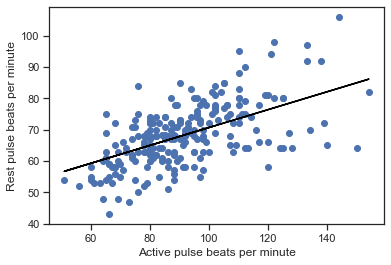

In [44]:
plt.scatter(df['Active'],df['Rest'])
plt.plot(np.array(X_train1),lr.predict(X_train),color='black')
plt.xlabel('Active pulse beats per minute')
plt.ylabel('Rest pulse beats per minute')


In [45]:
m = lr.coef_
b = lr.intercept_
print('Fitted model equation:')
print('y = ',m,'x + ',b)

Fitted model equation:
y =  [[0.28511202]] x +  [42.18204073]


In [46]:

r2 = r2_score(y_train,lr.predict(X_train))
print("The coefficient of determination is")
r2
print("It's not a good fit since value of r2 is 0.3")

The coefficient of determination is
It's not a good fit since value of r2 is 0.3
